# **Cardiovascular Risk Factor Data**
### Predicting the 10-year risk of future coronary heart disease (CHD) in patients.

**All the cells are already runned in this notebook, however, if you wish to run again, make sure the .csv file is mounted. If not, select 'Files' icon from the bar on the left and manually upload the data_cardiovascular_risk.csv file then run all the cells again. Everything will be working fine InshaAllah.
The csv file is attached to the notebook found on the classroom zip file.**



> ### Reading the data from the csv file



In [ ]:
# Pandas is used here to read and load the data from a CSV file into a DataFrame, which provides a convenient and efficient way to store and manipulate tabular data in memory.
import pandas as pd
data = pd.read_csv('/content/data_cardiovascular_risk.csv')
df = data # Using df (dataframe) as a naming convention for the dataset


> ### Classification of Variables: Distinguishing Quantitative and Categorical Columns in the Dataset





| **Quantitative** |     **Categorical**     |
|------------------|-------------------------|
|      age         | sex                  |
|   cigsPerDay          | education         |
|    heartRate        |    BPMeds                |
|     totChol       |       is_smoking             |
|    sysBP      |        prevalentStroke        |
|      diaBP        |       prevalentHyp              |
|    BMI      |        diabetes         |
|    glucose      |        TenYearCHD          |
|             |                    |



> ### Label Encoding of the Categorical Columns in the Dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns 'sex' and 'is_smoking' which has binary string values which needs a numerical
# conversion for statitsical analysis
df['sex'] = label_encoder.fit_transform(df['sex'])
df['is_smoking'] = label_encoder.fit_transform(df['is_smoking'])

> ### Removing the Outliers from the Dataset and displaying before and after effect

In [ ]:
import numpy as np

# Select numerical columns except the 'id' column, the categorical columns and the target variable column 'TenYearCHD'
numeric_columns = df.select_dtypes(include=np.number).drop(columns=['id','TenYearCHD','sex', 'education', 'diabetes', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp'])

# Calculate the IQR for each numerical column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outlier detection
threshold = 1.5

# Identify rows with outliers
outlier_rows = ((numeric_columns < (Q1 - threshold * IQR)) | (numeric_columns > (Q3 + threshold * IQR))).any(axis=1)

# Remove rows with outliers
df_no_outliers = df[~outlier_rows]

# Print the resulting DataFrame without outliers
print(df_no_outliers)

        id  age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0    0           1         3.0     0.0   
1        1   36        4.0    1           0         0.0     0.0   
2        2   46        1.0    0           1        10.0     0.0   
3        3   50        1.0    1           1        20.0     0.0   
4        4   64        1.0    0           1        30.0     0.0   
...    ...  ...        ...  ...         ...         ...     ...   
3383  3383   57        3.0    0           0         0.0     0.0   
3385  3385   60        1.0    0           0         0.0     0.0   
3386  3386   46        1.0    0           0         0.0     0.0   
3388  3388   60        1.0    1           0         0.0     NaN   
3389  3389   54        3.0    0           0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1  

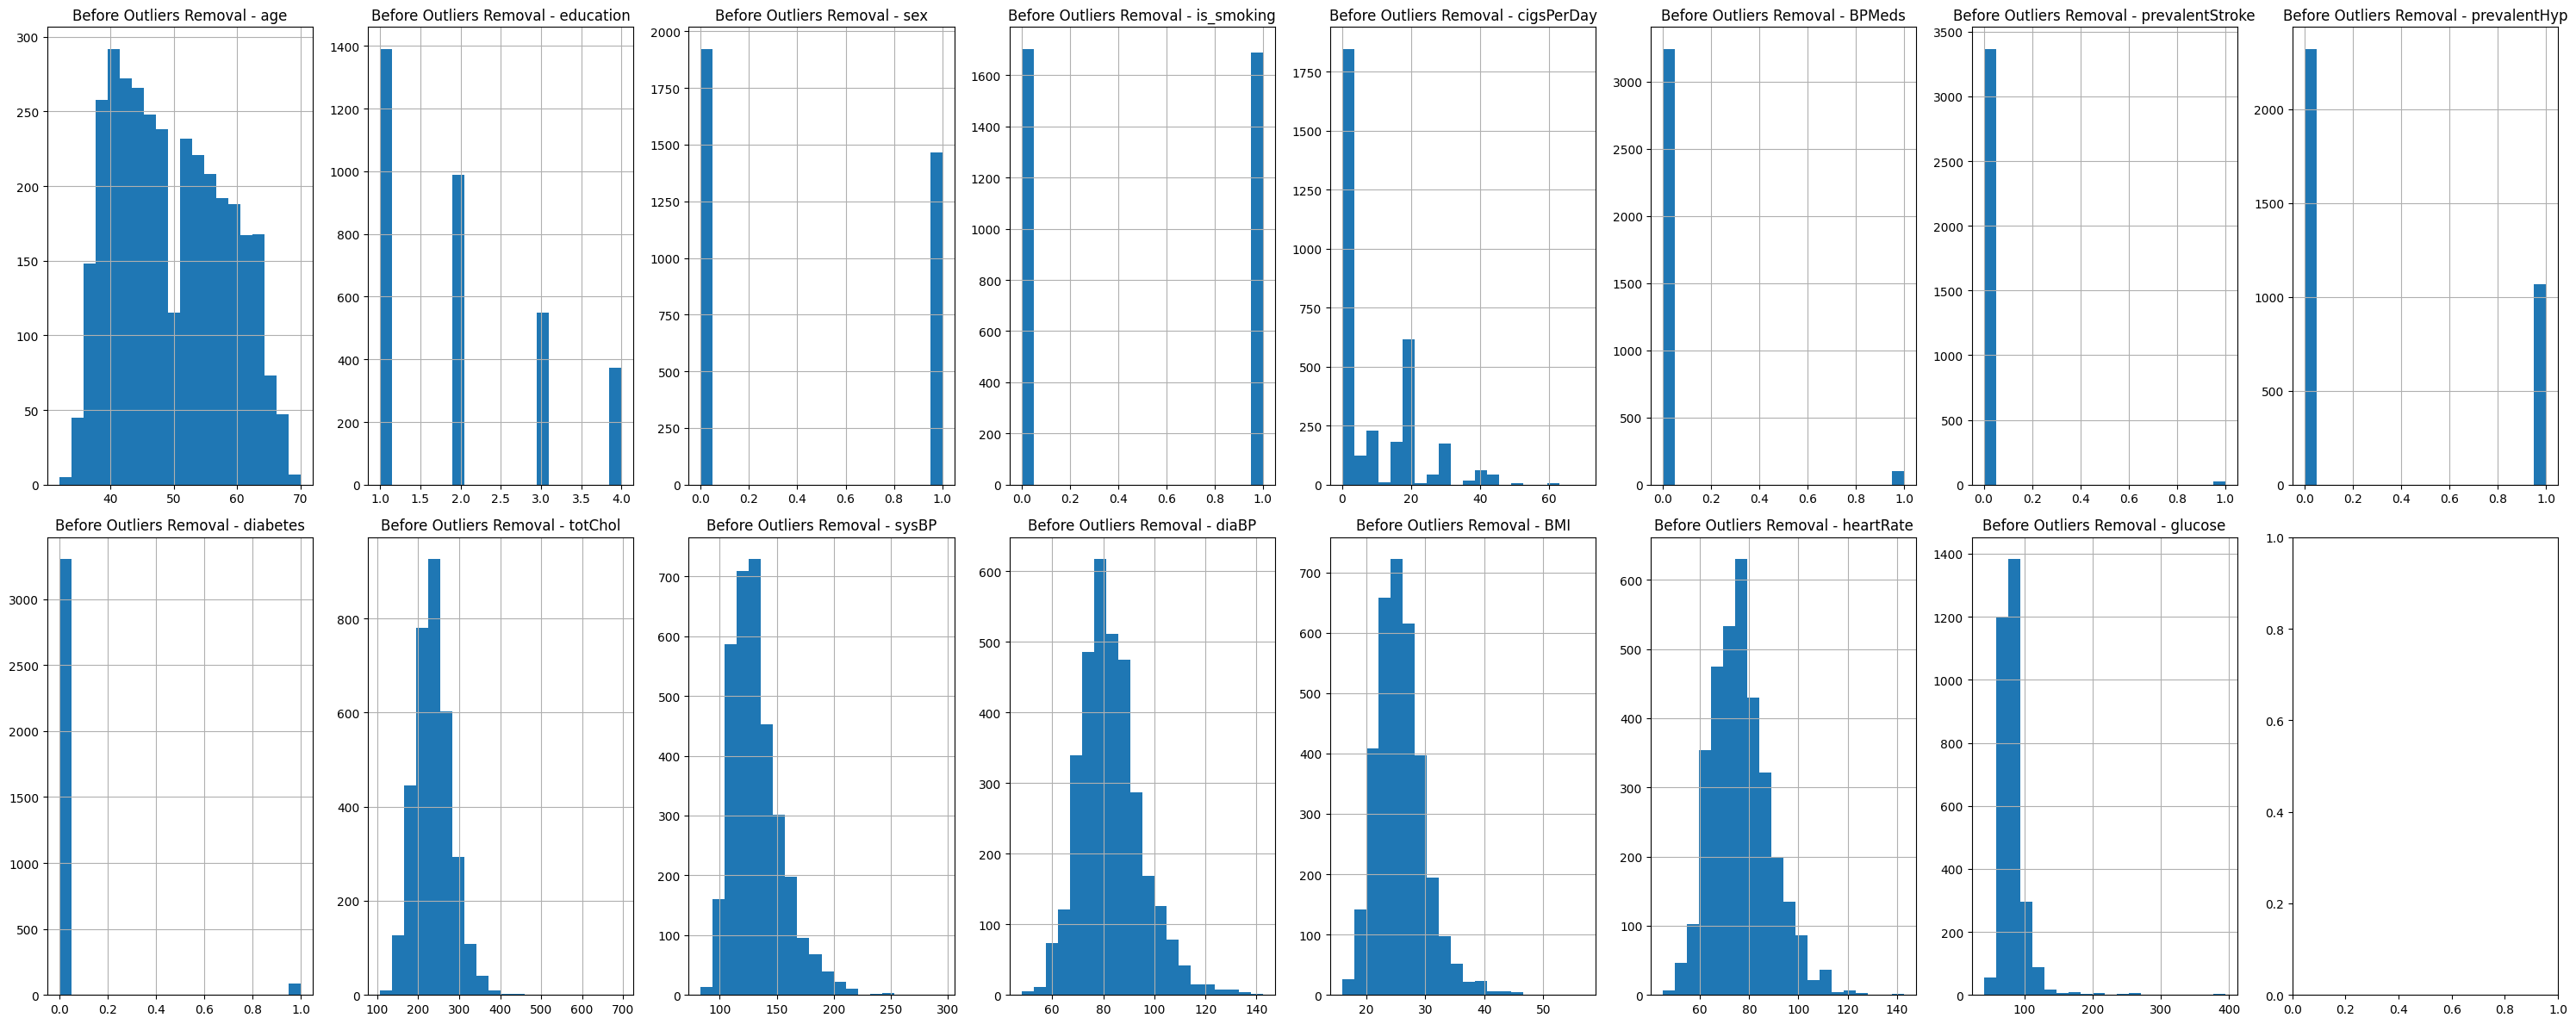

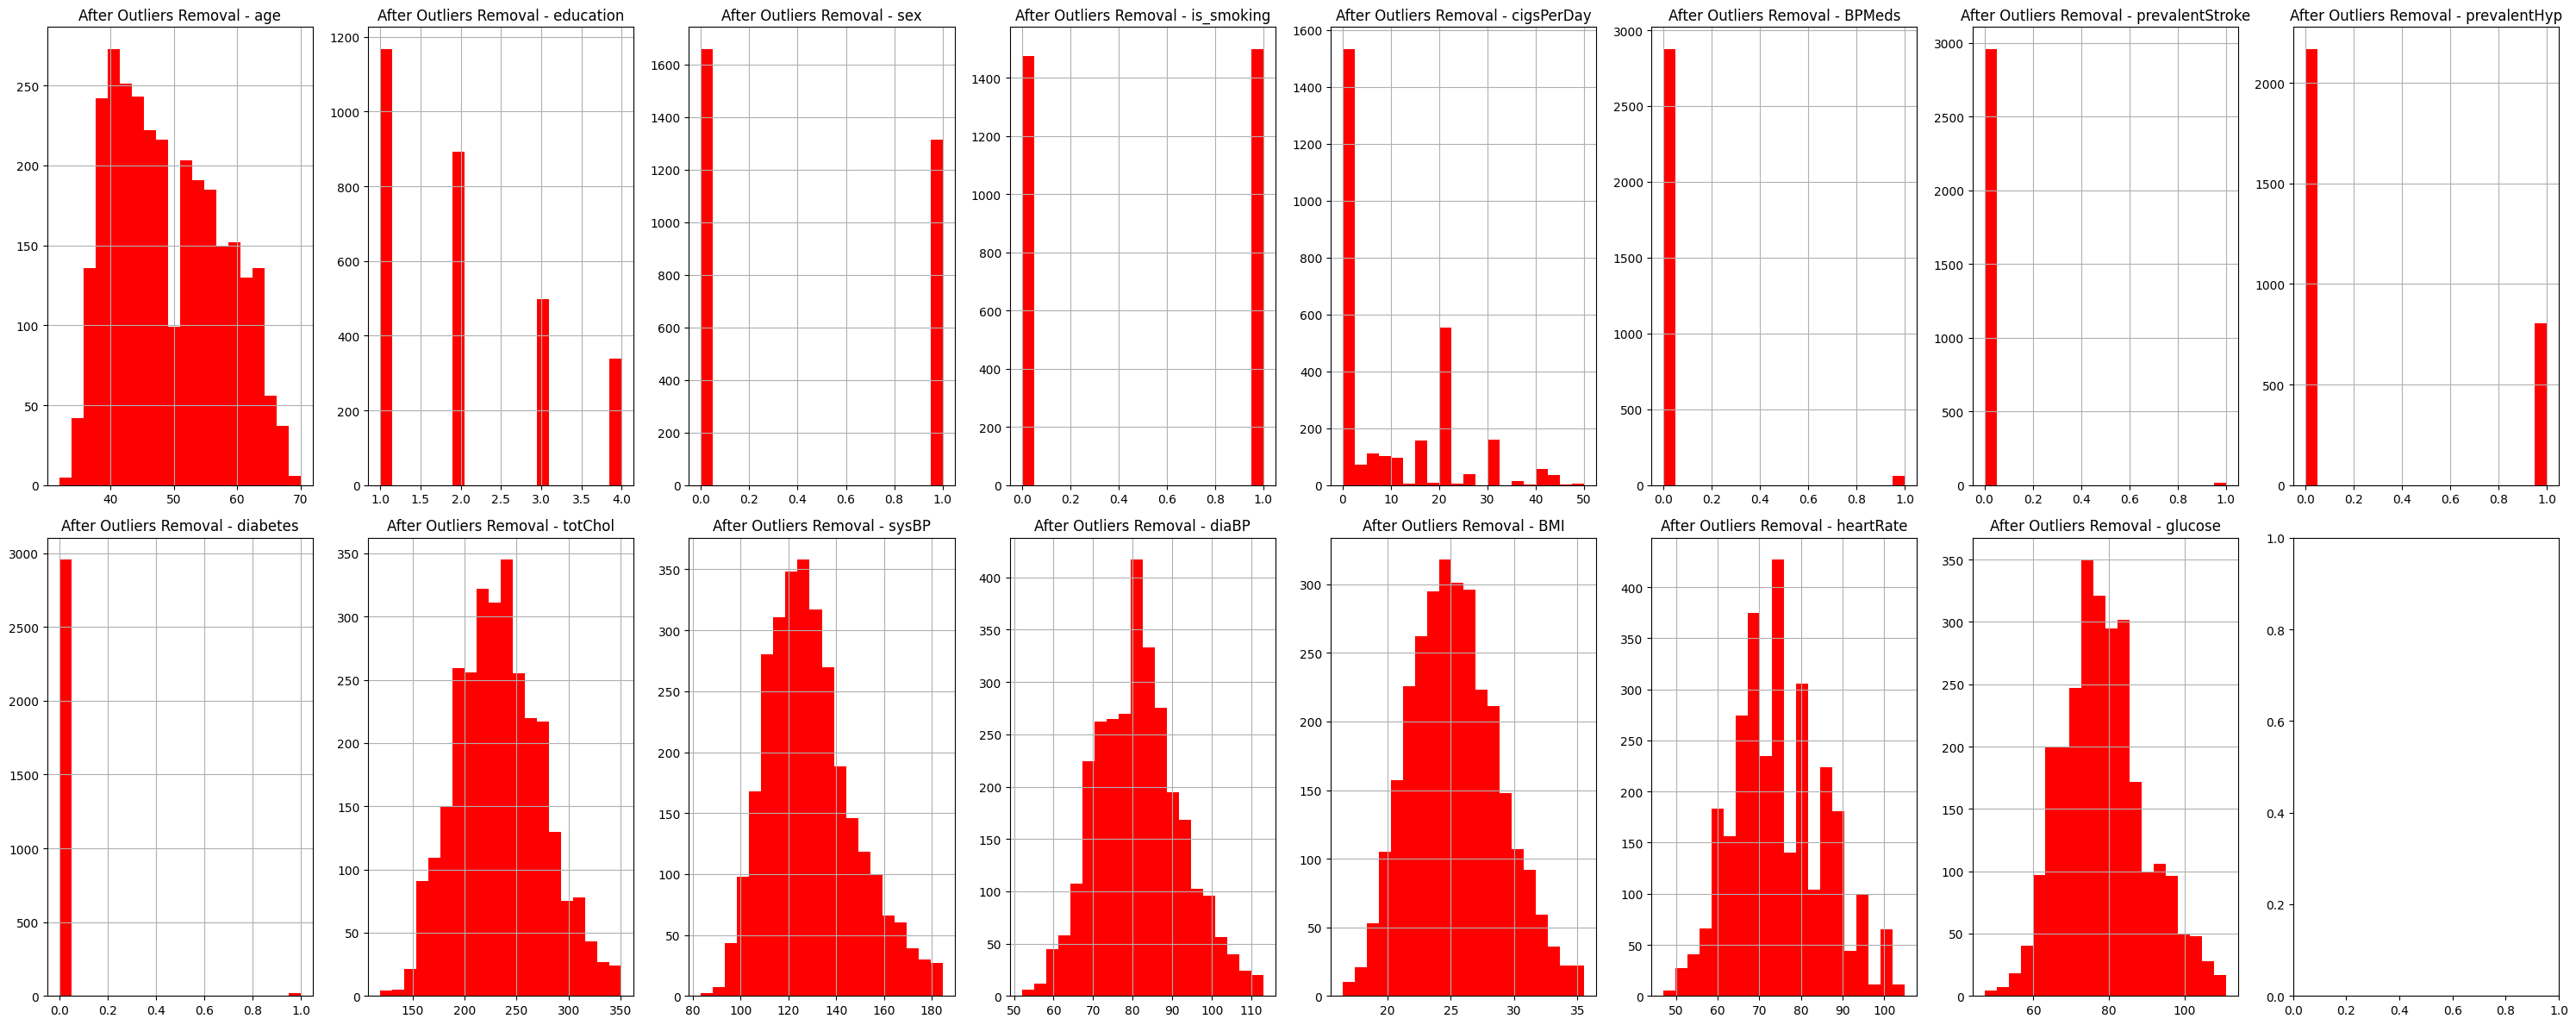

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms of numeric columns before outliers removal
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(30, 12))
numeric_columns = df.drop(['id', 'TenYearCHD'], axis=1).select_dtypes(include=[np.number]).columns

for ax, col in zip(axes.flatten(), numeric_columns):
    df[col].hist(ax=ax, bins=20)
    ax.set_title(f'Before Outliers Removal - {col}')

plt.tight_layout()
plt.show()

# Plot histograms of numeric columns after outliers removal
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(30, 12))
numeric_columns_no_outliers = df_no_outliers.drop(['id', 'TenYearCHD'], axis=1).select_dtypes(include=[np.number]).columns

for ax, col in zip(axes.flatten(), numeric_columns_no_outliers):
    df_no_outliers[col].hist(ax=ax, bins=20, color='red')
    ax.set_title(f'After Outliers Removal - {col}')

plt.tight_layout()
plt.show()

> ### Descriptive Statistics - Measures of Central Tendency and Dispersion

In [ ]:
# Calculating Mode for all the data excluding the 'id' and 'TenYearCHD'
# Calculating Mean, median, standard deviation, and range for all the data excluding the id and TenYearCHD and categorical features

mode_values = df_no_outliers.drop(['id', 'TenYearCHD'], axis=1).mode().iloc[0]  # Mode may have multiple values, so we select the first one
mean_values = df_no_outliers.drop(['id', 'TenYearCHD','sex', 'education', 'diabetes', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp'], axis=1).mean(numeric_only=True, skipna=True) # Missing values in the columns will be skipped and not included in the mean calculation
median_values = df_no_outliers.drop(['id', 'TenYearCHD', 'sex', 'education', 'diabetes', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp'], axis=1).median()
std_values = df_no_outliers.drop(['id', 'TenYearCHD', 'sex', 'education', 'diabetes', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp'], axis=1).std()

# Calculating min and max values
numeric_columns_no_outliers = df_no_outliers.select_dtypes(include=[np.number]).drop(columns=['id', 'TenYearCHD', 'sex', 'education', 'diabetes', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp'])
min_values = numeric_columns_no_outliers.min()
max_values = numeric_columns_no_outliers.max()

# Calculating count for all columns excluding the 'id' and 'TenYearCHD'
count_values = df_no_outliers.drop(['id', 'TenYearCHD'], axis=1).count()

# Calculating range for numeric columns only
_numeric_columns_no_outliers = df_no_outliers.select_dtypes(include=[np.number]).drop(columns=['id', 'TenYearCHD', 'sex', 'education', 'diabetes', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp']).columns
range_values = df_no_outliers[_numeric_columns_no_outliers].max() - df_no_outliers[_numeric_columns_no_outliers].min()

# Display the calculated statistics
print("Mode values:")
print(mode_values)
print('-------------------')
print('-------------------')
print("Mean values:")
print(mean_values)
print('-------------------')
print('-------------------')
print("Median values:")
print(median_values)
print('-------------------')
print('-------------------')
print("Standard deviation values:")
print(std_values)
print('-------------------')
print('-------------------')
print("Range values:")
print(range_values)
print('-------------------')
print('-------------------')
print("Minimum values:")
print(min_values)
print('-------------------')
print('-------------------')
print("Maximum values:")
print(max_values)
print('-------------------')
print('-------------------')
print("Count values:")
print(count_values)
print('-------------------')
print('-------------------')

Mode values:
age                 40.00
education            1.00
sex                  0.00
is_smoking           1.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            240.00
sysBP              120.00
diaBP               80.00
BMI                 22.91
heartRate           75.00
glucose             75.00
Name: 0, dtype: float64
-------------------
-------------------
Mean values:
age            49.057479
cigsPerDay      9.133581
totChol       234.367097
sysBP         129.327227
diaBP          81.517311
BMI            25.389858
heartRate      74.891056
glucose        78.313682
dtype: float64
-------------------
-------------------
Median values:
age            48.00
cigsPerDay      1.00
totChol       232.00
sysBP         127.00
diaBP          81.00
BMI            25.14
heartRate      75.00
glucose        77.00
dtype: float64
-------------------
-------------------
Standard deviation values:


In [ ]:
# Count occurrences of each value in the specified columns (categorical features)
sex_counts = df_no_outliers['sex'].value_counts()
education_counts = df_no_outliers['education'].value_counts()
diabetes_counts = df_no_outliers['diabetes'].value_counts()
is_smoking_counts = df_no_outliers['is_smoking'].value_counts()
BPMeds_counts = df_no_outliers['BPMeds'].value_counts()
prevalentStroke_counts = df_no_outliers['prevalentStroke'].value_counts()
prevalentHyp_counts = df_no_outliers['prevalentHyp'].value_counts()

# Extract the counts for values in the columns
count_sex_0 = sex_counts[0] if 0 in sex_counts else 0
count_sex_1 = sex_counts[1] if 1 in sex_counts else 0

count_education_1 = education_counts[1] if 1 in education_counts else 0
count_education_2 = education_counts[2] if 2 in education_counts else 0
count_education_3 = education_counts[3] if 3 in education_counts else 0
count_education_4 = education_counts[4] if 4 in education_counts else 0

count_diabetes_0 = diabetes_counts[0] if 0 in diabetes_counts else 0
count_diabetes_1 = diabetes_counts[1] if 1 in diabetes_counts else 0

count_is_smoking_0 = is_smoking_counts[0] if 0 in is_smoking_counts else 0
count_is_smoking_1 = is_smoking_counts[1] if 1 in is_smoking_counts else 0

count_BPMeds_0 = BPMeds_counts[0] if 0 in BPMeds_counts else 0
count_BPMeds_1 = BPMeds_counts[1] if 1 in BPMeds_counts else 0

count_prevalentStroke_0 = prevalentStroke_counts[0] if 0 in prevalentStroke_counts else 0
count_prevalentStroke_1 = prevalentStroke_counts[1] if 1 in prevalentStroke_counts else 0

count_prevalentHyp_0 = prevalentHyp_counts[0] if 0 in prevalentHyp_counts else 0
count_prevalentHyp_1 = prevalentHyp_counts[1] if 1 in prevalentHyp_counts else 0

# Display the percentages of categorical features

print(f"Females:{count_sex_0 / df_no_outliers['sex'].count() * 100 : 0.2f}%")
print(f"Males:{count_sex_1 / df_no_outliers['sex'].count() * 100 : 0.2f}%")
print()
print(f"Education(level 1):{count_education_1 / df_no_outliers['education'].count() * 100 : 0.2f}%")
print(f"Education(level 2):{count_education_2 / df_no_outliers['education'].count() * 100 : 0.2f}%")
print(f"Education(level 3):{count_education_3 / df_no_outliers['education'].count() * 100 : 0.2f}%")
print(f"Education(level 4):{count_education_4 / df_no_outliers['education'].count() * 100 : 0.2f}%")
print()
print(f"Does Not Have Diabetes:{count_diabetes_0 / df_no_outliers['diabetes'].count() * 100 : 0.2f}%")
print(f"Has Diabetes:{count_diabetes_1 / df_no_outliers['diabetes'].count() * 100 : 0.2f}%")
print()
print(f"Currently Smoking:{count_is_smoking_0 / df_no_outliers['is_smoking'].count() * 100 : 0.2f}%")
print(f"Not Smoking:{count_is_smoking_1 / df_no_outliers['is_smoking'].count() * 100 : 0.2f}%")
print()
print(f"Were not on a blood pressure medication:{count_BPMeds_0 / df_no_outliers['BPMeds'].count() * 100 : 0.2f}%")
print(f"Were on a blood pressure medication:{count_BPMeds_1 / df_no_outliers['BPMeds'].count() * 100 : 0.2f}%")
print()
print(f"Did not have previous strokes:{count_prevalentStroke_0 / df_no_outliers['prevalentStroke'].count() * 100 : 0.2f}%")
print(f"Had previous strokes:{count_prevalentStroke_1 / df_no_outliers['prevalentStroke'].count() * 100 : 0.2f}%")
print()
print(f"Were not hypertensive:{count_prevalentHyp_0 / df_no_outliers['prevalentHyp'].count() * 100 : 0.2f}%")
print(f"Were hypertensive:{count_prevalentHyp_1 / df_no_outliers['prevalentHyp'].count() * 100 : 0.2f}%")
print()



Females: 55.80%
Males: 44.20%

Education(level 1): 40.32%
Education(level 2): 30.82%
Education(level 3): 17.19%
Education(level 4): 11.67%

Does Not Have Diabetes: 99.36%
Has Diabetes: 0.64%

Currently Smoking: 49.58%
Not Smoking: 50.42%

Were not on a blood pressure medication: 97.89%
Were on a blood pressure medication: 2.11%

Did not have previous strokes: 99.46%
Had previous strokes: 0.54%

Were not hypertensive: 72.91%
Were hypertensive: 27.09%



> ### Standardization of features from the descriptive statistics above (Calculating the Z-score)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize (Quantitative features only)
columns_to_standardize = ['age', 'cigsPerDay', 'heartRate', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

# Standardize selected columns
scaler = StandardScaler()
df_no_outliers[columns_to_standardize] = scaler.fit_transform(df_no_outliers[columns_to_standardize])

# Output the standardized DataFrame
print(df_no_outliers)

        id       age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0        0  1.759272        2.0    0           1   -0.526779     0.0   
1        1 -1.537335        4.0    1           0   -0.784432     0.0   
2        2 -0.359975        1.0    0           1    0.074412     0.0   
3        3  0.110969        1.0    1           1    0.933255     0.0   
4        4  1.759272        1.0    0           1    1.792099     0.0   
...    ...       ...        ...  ...         ...         ...     ...   
3383  3383  0.935121        3.0    0           0   -0.784432     0.0   
3385  3385  1.288329        1.0    0           0   -0.784432     0.0   
3386  3386 -0.359975        1.0    0           0   -0.784432     0.0   
3388  3388  1.288329        1.0    1           0   -0.784432     NaN   
3389  3389  0.581913        3.0    0           0   -0.784432     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                   0             0         0 -0.326177 

<ipython-input-7-eb7ec57cfbcd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[columns_to_standardize] = scaler.fit_transform(df_no_outliers[columns_to_standardize])


> ### Representation of some features after standardization

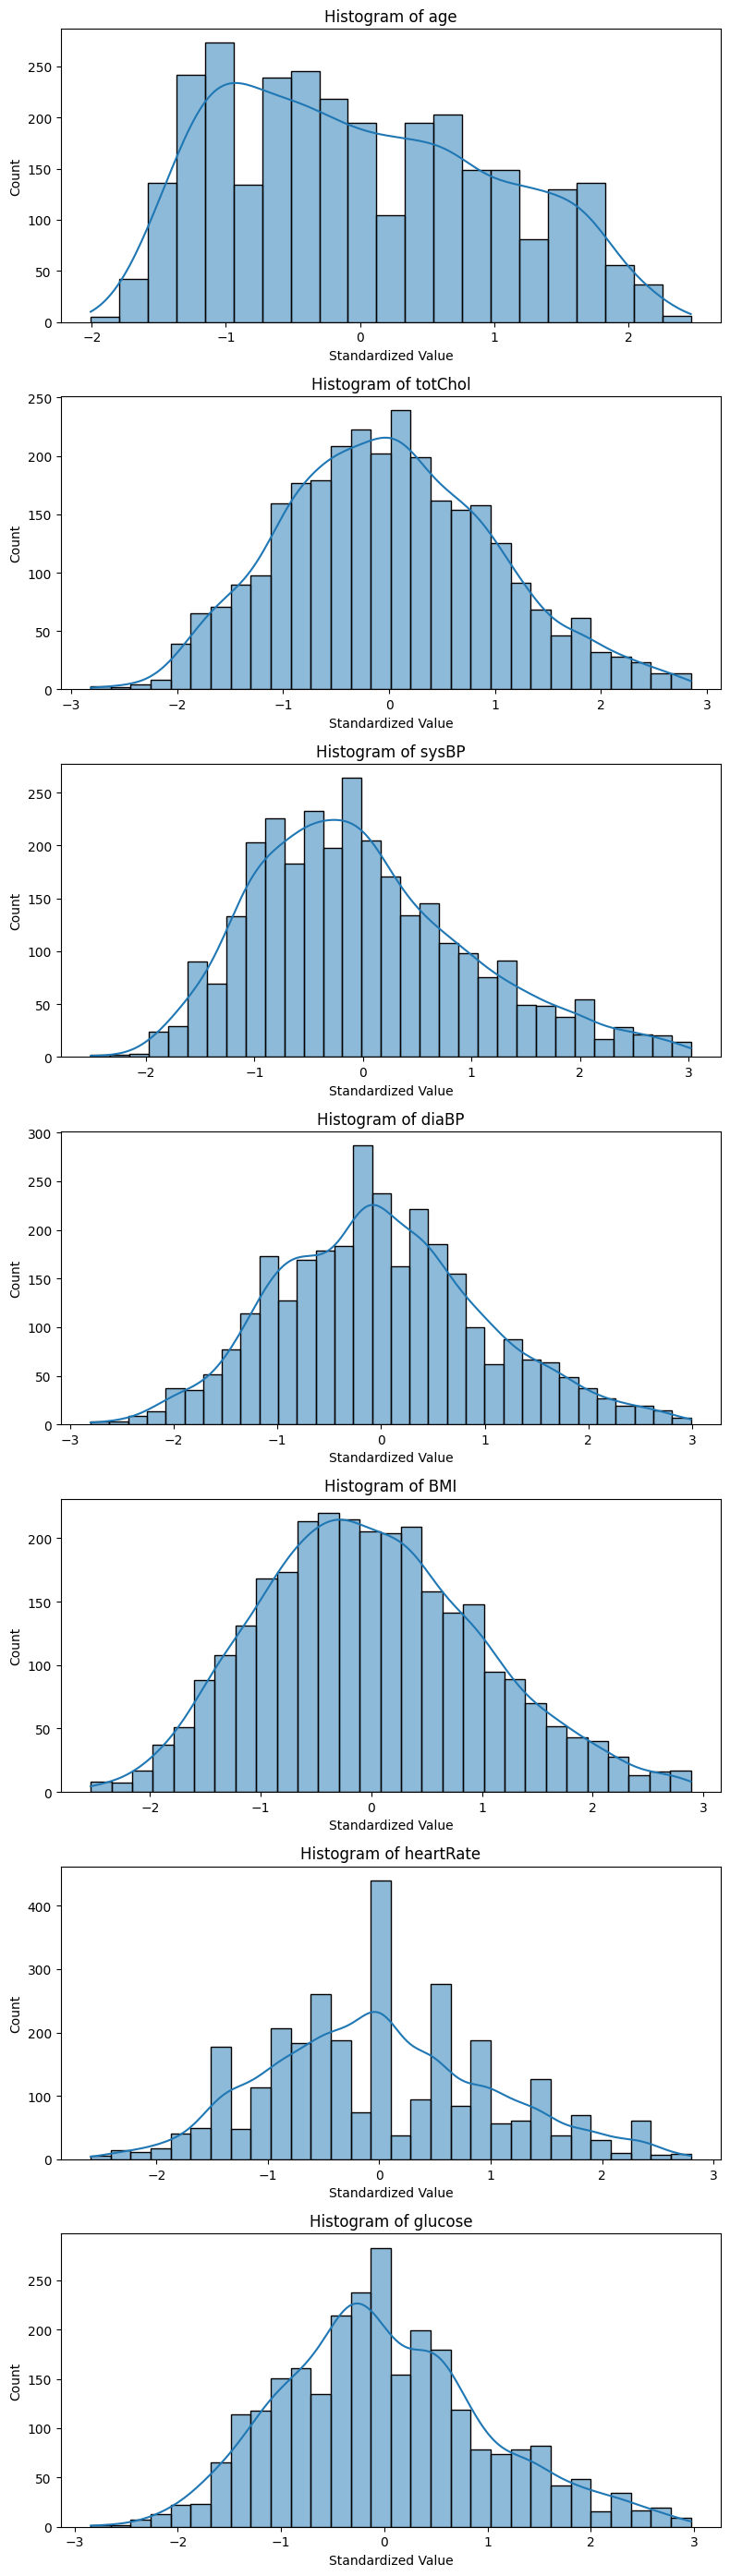

In [ ]:
import seaborn as sns

# Define the attributes to exclude from plotting
exclude_attributes = ['id','TenYearCHD','sex', 'education', 'diabetes', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'cigsPerDay']

# Filter columns for plotting
plot_columns = [column for column in df_no_outliers.columns if column not in exclude_attributes]

# Plot histograms for standardized features
fig, axs = plt.subplots(len(plot_columns), figsize=(8, 4 * len(plot_columns)))
idx = 0

for i, column in enumerate(plot_columns):
    sns.histplot(df_no_outliers[column], kde=True, ax=axs[idx])
    axs[idx].set_xlabel('Standardized Value')
    axs[idx].set_ylabel('Count')
    axs[idx].set_title(f'Histogram of {column}')
    idx += 1

plt.tight_layout()
plt.show()


> ### Variable which has standardized quantitative features with no outliers together with the categorical features (cleaned data)

In [ ]:
cv_data = df_no_outliers.drop(['id'], axis=1)
print(cv_data)

           age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0     1.759272        2.0    0           1   -0.526779     0.0   
1    -1.537335        4.0    1           0   -0.784432     0.0   
2    -0.359975        1.0    0           1    0.074412     0.0   
3     0.110969        1.0    1           1    0.933255     0.0   
4     1.759272        1.0    0           1    1.792099     0.0   
...        ...        ...  ...         ...         ...     ...   
3383  0.935121        3.0    0           0   -0.784432     0.0   
3385  1.288329        1.0    0           0   -0.784432     0.0   
3386 -0.359975        1.0    0           0   -0.784432     0.0   
3388  1.288329        1.0    1           0   -0.784432     NaN   
3389  0.581913        3.0    0           0   -0.784432     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                   0             0         0 -0.326177  1.022446  0.330462   
1                   0             1         0 -0.

> ### Filling the missing data with the mean of each feature

In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Choosing the mean strategy to replace any Nan

# Applying imputation on the dataset
imputed_data = imputer.fit_transform(cv_data)

# Convert imputed_data back to a DataFrame
imputed = pd.DataFrame(imputed_data, columns=cv_data.columns)

> ### Heat maps before that represent the dependencies of the features with respect to each other

<Axes: >

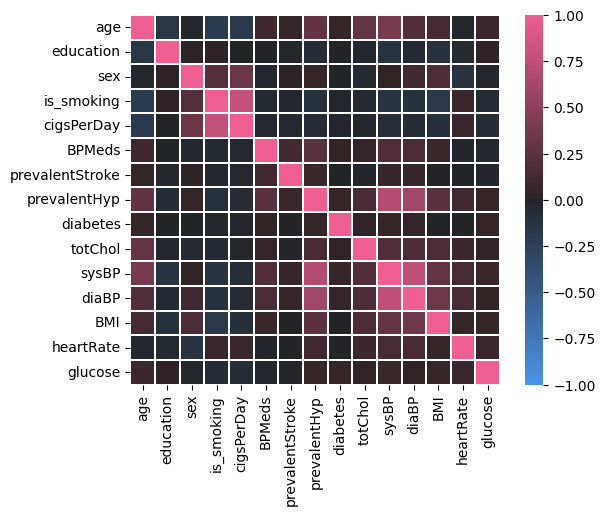

In [ ]:
# Displaying the heat map before removing dependencies
corr= imputed.iloc[:,:-1].corr(method="pearson")
cmap= sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr,vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=.2)

As you can notice in the first heat map, there is a relatively strong relationship between `sysBP` with `diaBP` , `cigsperday` with `is_smokin` ,`sysBP` with `prevalentHyp`and `diaBP` with `prevalentHyp`. In order to use Naive Bayes, all the features should ideally be independent of each other. Therefore, it is recommended to remove some of the features to improve the accuracy and ensure the assumption of feature independence in Naive Bayes.

<Axes: >

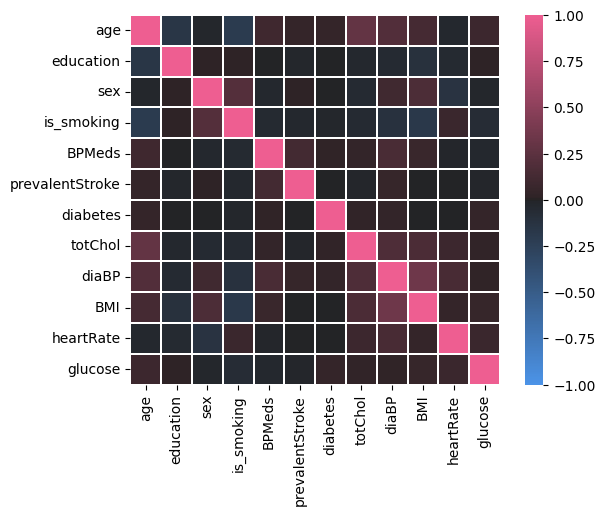

In [ ]:
# Displaying the heat map before removing dependencies (removing the "sysBP", "cigsPerDay","prevalentHyp" columns)
cv_data_no_dependencies = imputed.drop(["sysBP", "cigsPerDay","prevalentHyp"] , axis=1)
corr=cv_data_no_dependencies.iloc[:,:-1].corr(method="pearson")
cmap= sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr,vmax=1, vmin=-1, cmap=cmap, square=True, linewidths=.2)

> ### Splitting the data into training data (80%) and testing data (20%)

In [ ]:
from sklearn.model_selection import train_test_split

# Specify the features (X) and target variable (Y)
X = cv_data_no_dependencies
Y = cv_data_no_dependencies['TenYearCHD']  # Target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

> ### Plotting the histogram of each feature after removing the dependent columns

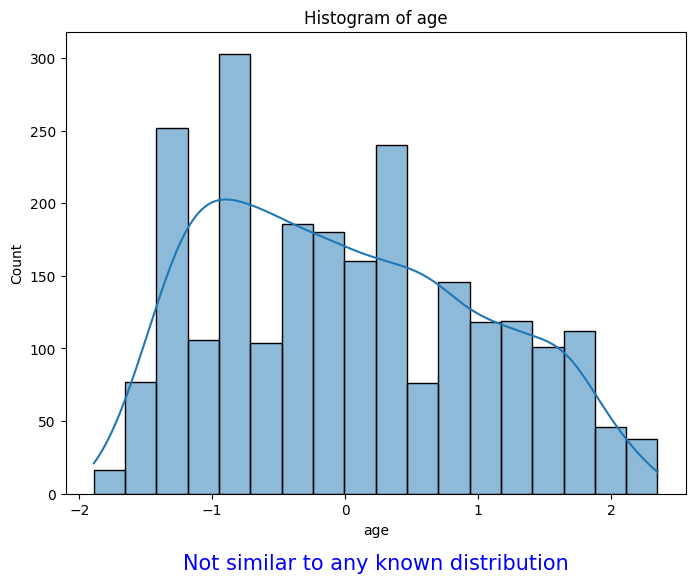

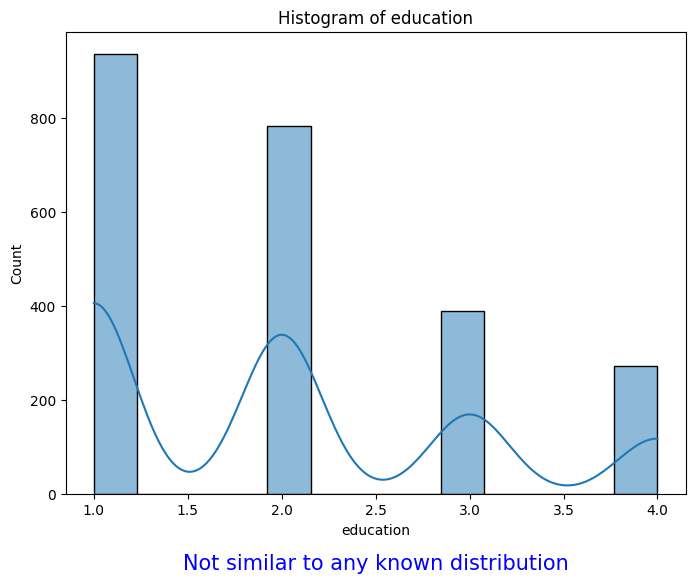

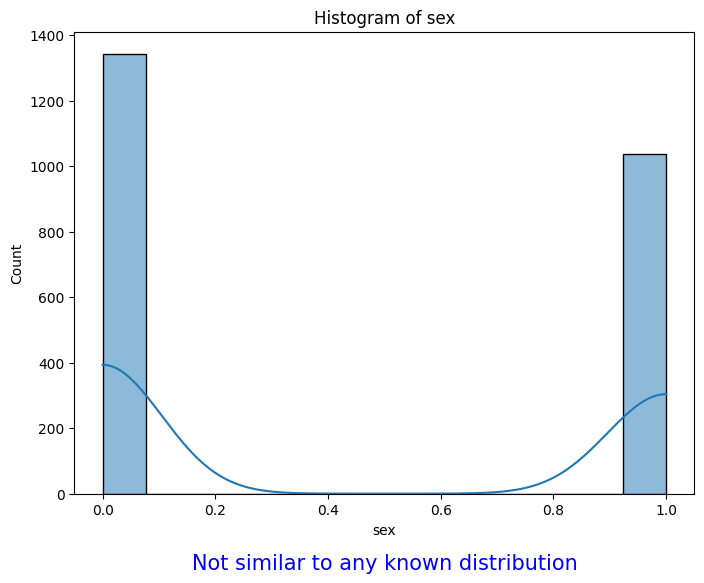

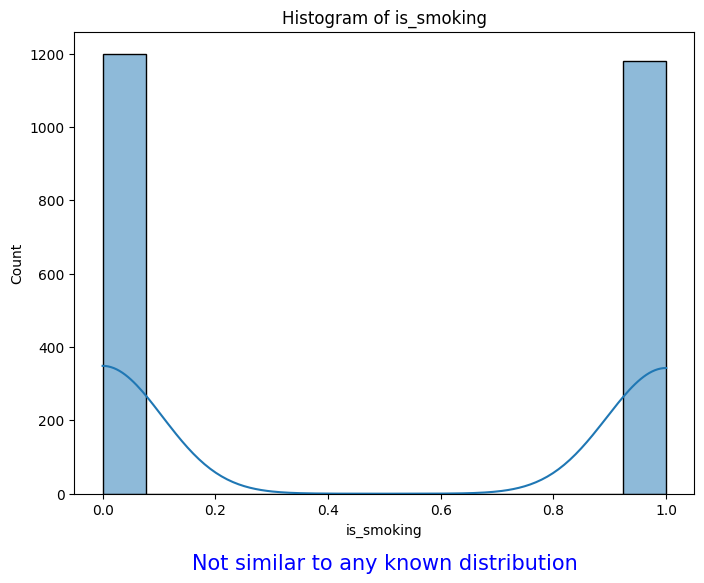

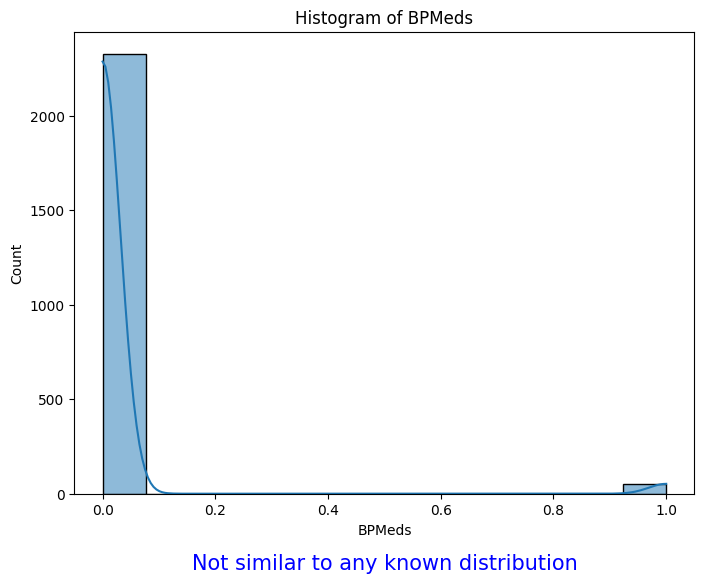

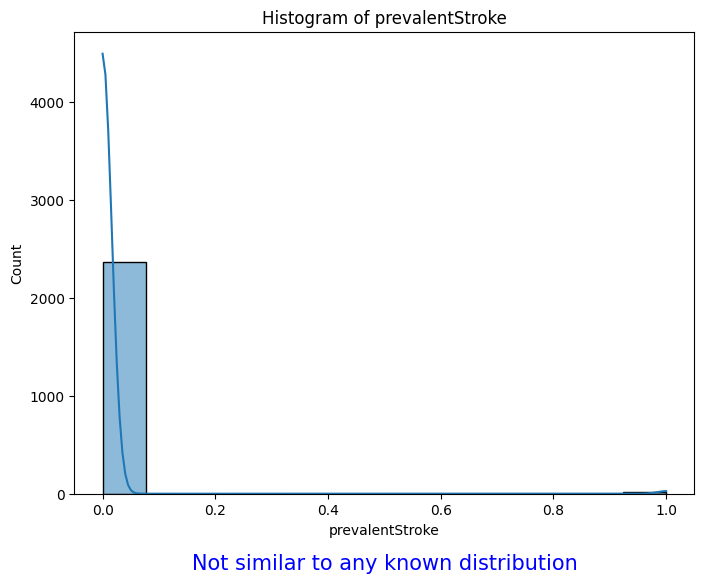

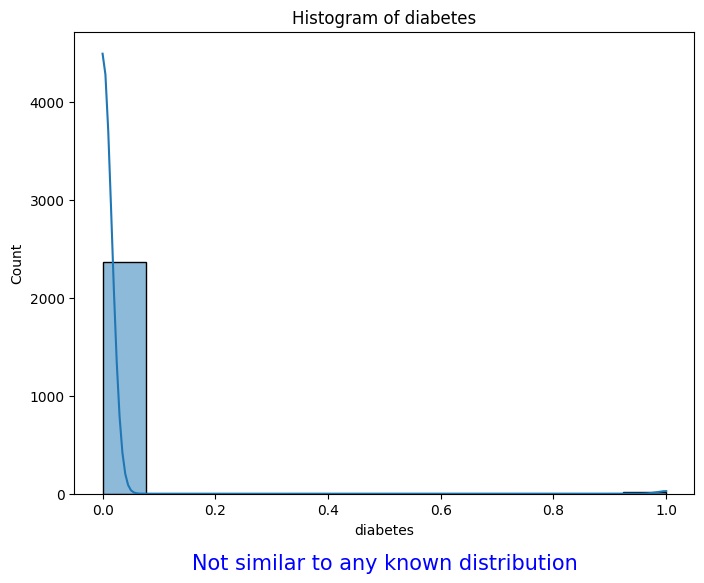

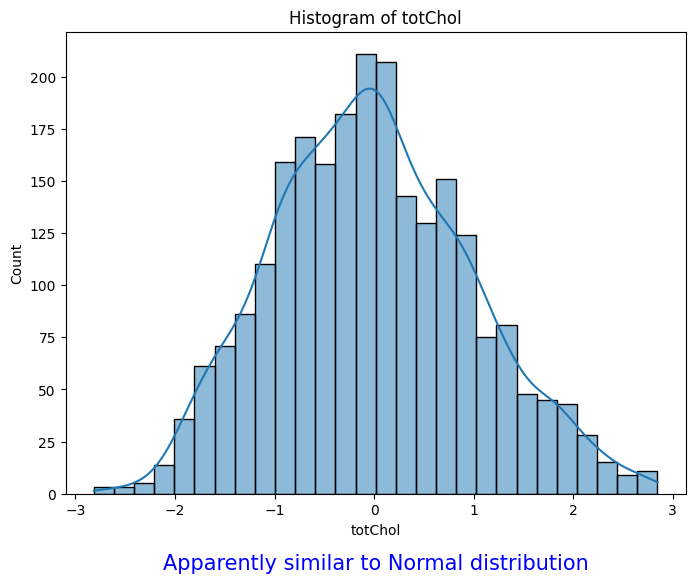

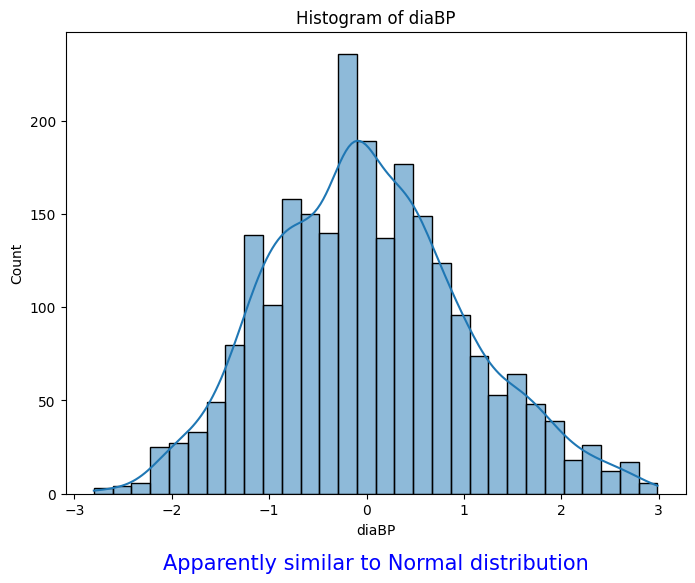

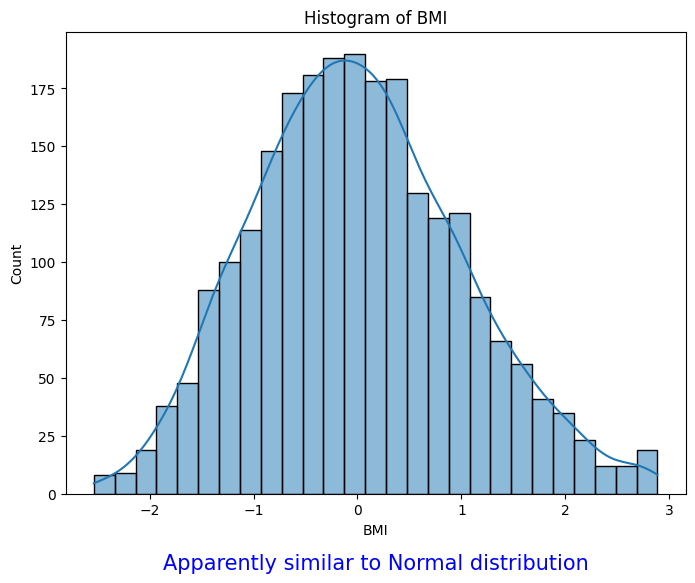

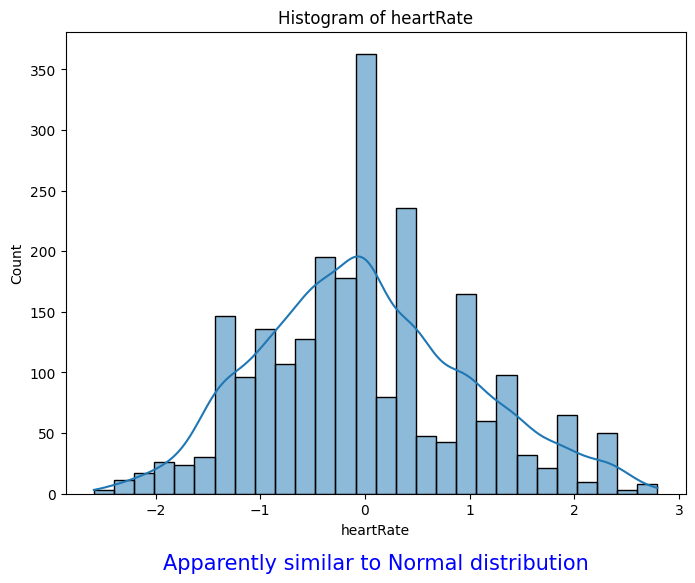

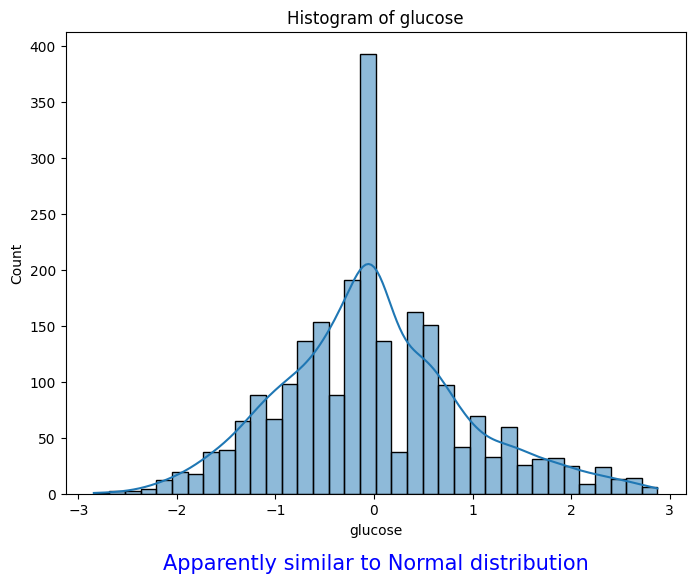

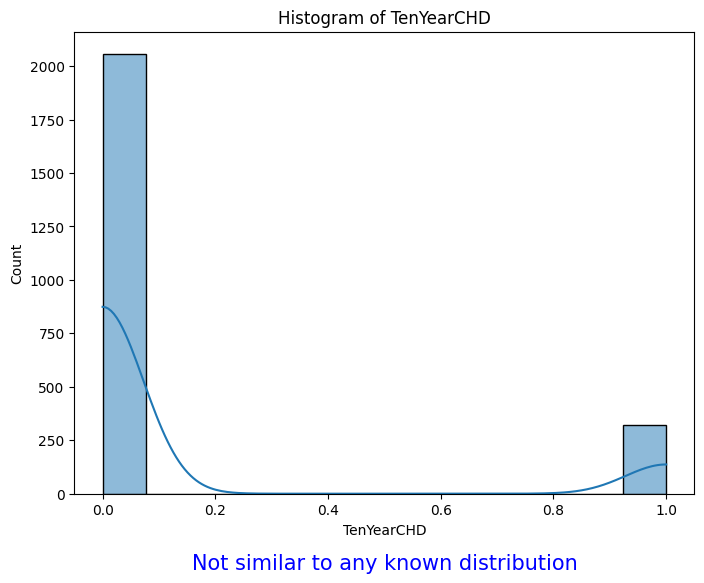

In [ ]:
# Iterate over each feature/column in the training data
for column in X_train.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Histogram of {column}')

    # Add comment "YES" below the histogram for categorical features
    if column in ['totChol','sysBP', 'diaBP','BMI', 'heartRate', 'glucose']:
        plt.text(0.5, -0.15, 'Apparently similar to Normal distribution', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=15, color='blue')
    else:
      plt.text(0.5, -0.15, 'Not similar to any known distribution', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=15, color='blue')

    plt.show()


> ### Null and Alternative hypotheses of Quantitative features using Shapiro-Wilk test

**Explanation:** The Shapiro-Wilk test is a statistical test used to assess whether a given sample of data follows a normal distribution. It tests the null hypothesis that the data is normally distributed against the alternative hypothesis that the data is not normally distributed.

The null hypothesis (H0) of the Shapiro-Wilk test is that the population from which the sample is drawn follows a normal distribution. It assumes that the data is normally distributed, meaning it has a symmetric bell-shaped distribution.

The alternative hypothesis (H1) of the Shapiro-Wilk test is that the population does not follow a normal distribution. It suggests that the data deviates from normality, indicating departures from the assumptions of a normal distribution, such as skewness, heavy tails, or significant outliers.

To perform the Shapiro-Wilk test, the test statistic (W) is calculated based on the observed data. The test statistic measures the discrepancy between the observed data and the expected values under the assumption of normality. The p-value associated with the test statistic is then compared to a chosen significance level (usually 0.05) to make a decision.

If the p-value is greater than the chosen significance level, we fail to reject the null hypothesis. It indicates that there is not enough evidence to conclude that the data significantly deviates from a normal distribution. In other words, we can consider the data as likely being normally distributed.

On the other hand, if the p-value is smaller than the chosen significance level, we reject the null hypothesis. It suggests that there is sufficient evidence to conclude that the data significantly departs from a normal distribution. In this case, we consider the data as not being normally distributed.

It's important to note that the Shapiro-Wilk test is sensitive to departures from normality, especially for smaller sample sizes. Therefore, even minor deviations from normality can lead to rejecting the null hypothesis.

In [ ]:
from scipy.stats import shapiro

# Iterate over each feature/column in the training data
columns_to_drop = ['sex', 'education', 'diabetes', 'is_smoking', 'BPMeds', 'prevalentStroke']
X_train_no_categorical = X_train.drop(columns=columns_to_drop)
X_train_no_categorical = pd.DataFrame(X_train_no_categorical)

for column in X_train_no_categorical.columns:
    stat, p_value = shapiro(X_train_no_categorical[column])
    alpha = 0.05  # Set the significance level

    print(f'{column}:')
    print(f'Statistic: {stat:}, p-value: {p_value:}')

    if p_value > alpha:
        print("The feature/column is likely normally distributed.")
    else:
        print("The feature/column is not normally distributed.")
    print()

age:
Statistic: 0.9647549986839294, p-value: 1.1405537927719926e-23
The feature/column is not normally distributed.

totChol:
Statistic: 0.9938585162162781, p-value: 2.0396283773038704e-08
The feature/column is not normally distributed.

diaBP:
Statistic: 0.993001401424408, p-value: 2.910863772243033e-09
The feature/column is not normally distributed.

BMI:
Statistic: 0.99307781457901, p-value: 3.442615748028288e-09
The feature/column is not normally distributed.

heartRate:
Statistic: 0.9862422347068787, p-value: 2.1440716294952346e-14
The feature/column is not normally distributed.

glucose:
Statistic: 0.986079752445221, p-value: 1.701425594380704e-14
The feature/column is not normally distributed.

TenYearCHD:
Statistic: 0.40409380197525024, p-value: 0.0
The feature/column is not normally distributed.



> ### Null and Alternative hypotheses of Categorical features using Chi-square test

**Explanation:**

Null hypothesis (H0) of the chi-square test:

H0: There is no association between the categorical feature and the target variable.

---



Alternative hypothesis (Ha) of the chi-square test:


Ha: There is an association between the categorical feature and the target variable.

In [ ]:
from scipy.stats import chi2_contingency

categorical_columns = ['sex', 'education', 'diabetes', 'is_smoking', 'BPMeds', 'prevalentStroke']

for feature in categorical_columns:
    contingency_table = pd.crosstab(X_train[feature], Y_train)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    print(f"Chi-square test for {feature}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    if(p_value <= 0.05):
      print(f"There is an association between the {feature} and the target variable TenYearCHD")
    else:
      print(f"There is no association between the {feature} and the target variable TenYearCHD")
    print("")

Chi-square test for sex:
Chi-square statistic: 22.446415306561285
P-value: 2.1608839862630898e-06
There is an association between the sex and the target variable TenYearCHD

Chi-square test for education:
Chi-square statistic: 20.081546222660116
P-value: 0.00048122383400805595
There is an association between the education and the target variable TenYearCHD

Chi-square test for diabetes:
Chi-square statistic: 0.0
P-value: 1.0
There is no association between the diabetes and the target variable TenYearCHD

Chi-square test for is_smoking:
Chi-square statistic: 5.662602642383401
P-value: 0.017330387643835713
There is an association between the is_smoking and the target variable TenYearCHD

Chi-square test for BPMeds:
Chi-square statistic: 12.860279648944775
P-value: 0.0016122253901611847
There is an association between the BPMeds and the target variable TenYearCHD

Chi-square test for prevalentStroke:
Chi-square statistic: 13.029043511263152
P-value: 0.0003066971530758536
There is an assoc

> ### Conditional distribution plots of each feature on each target class (TenYearCHD)

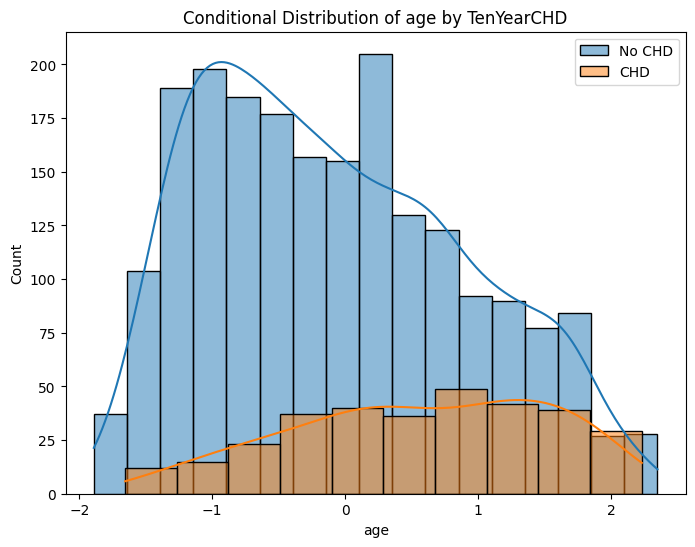

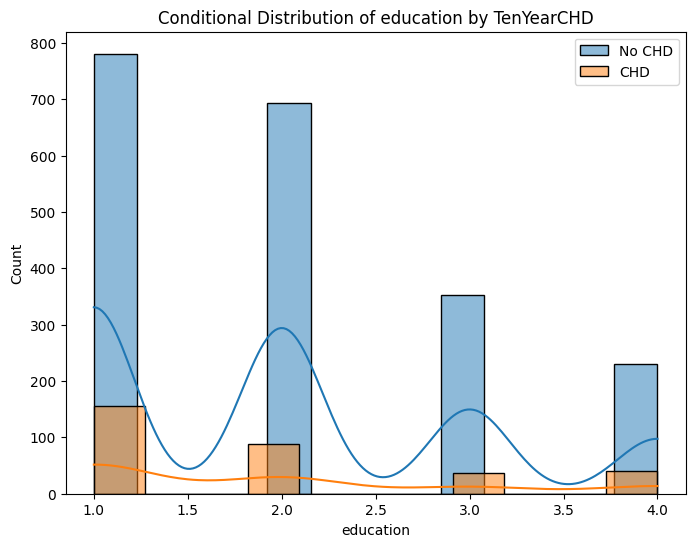

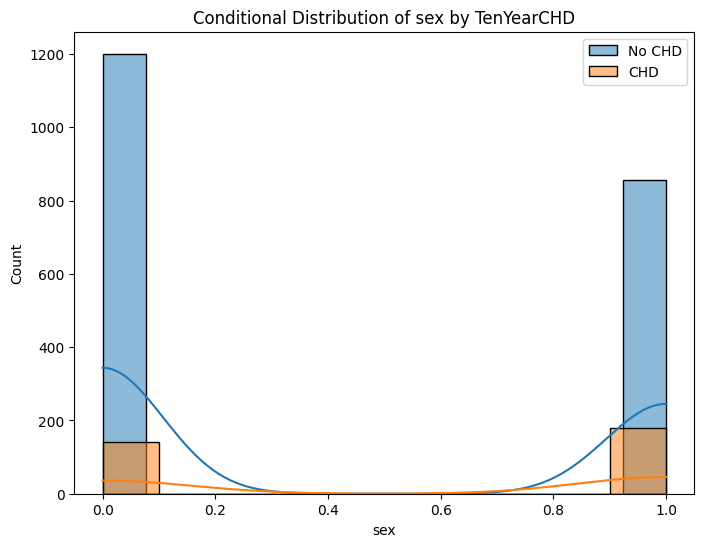

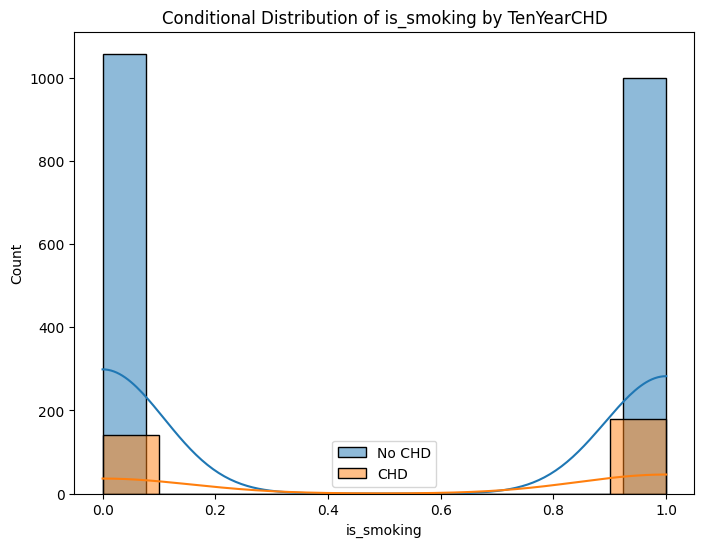

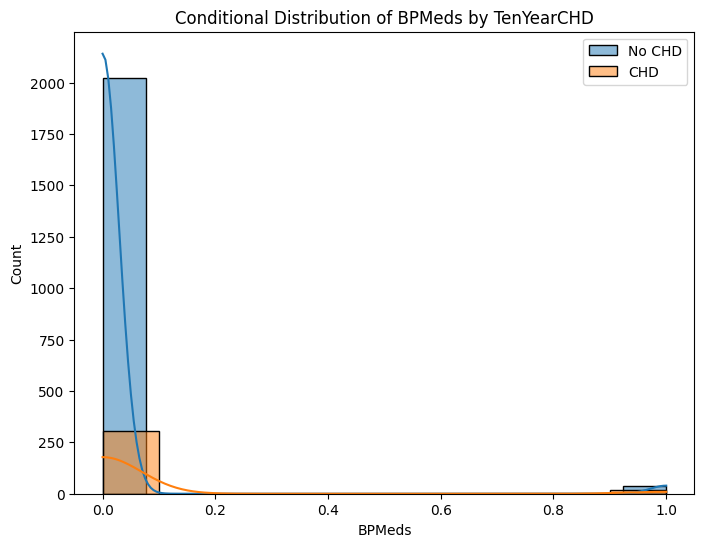

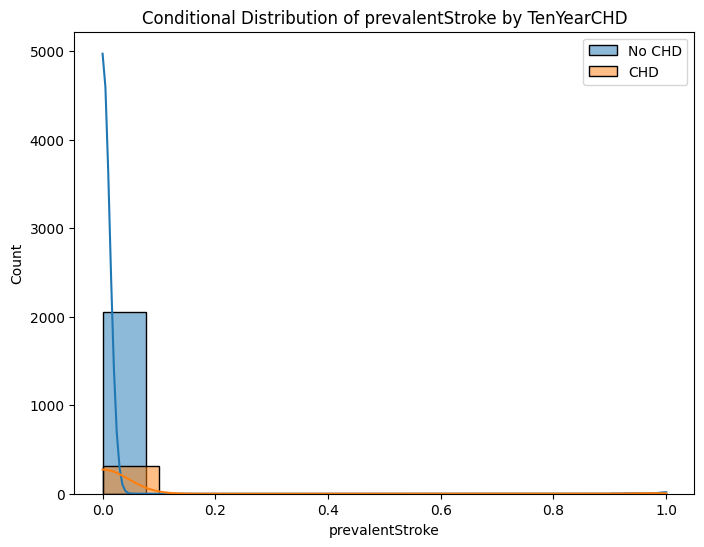

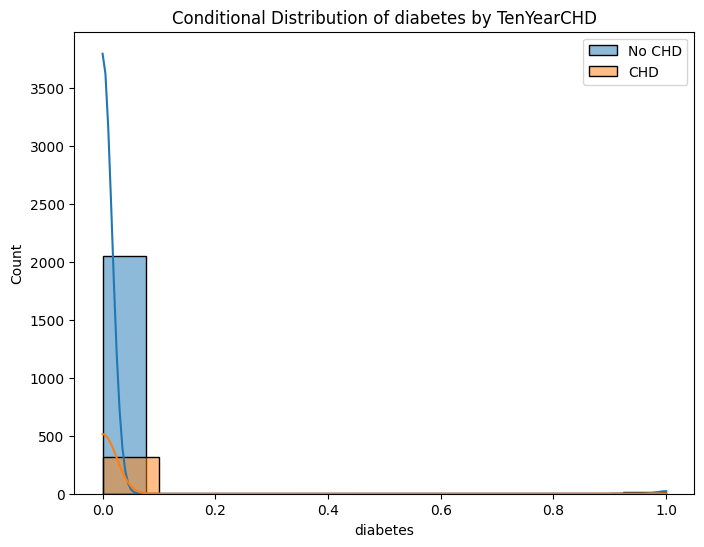

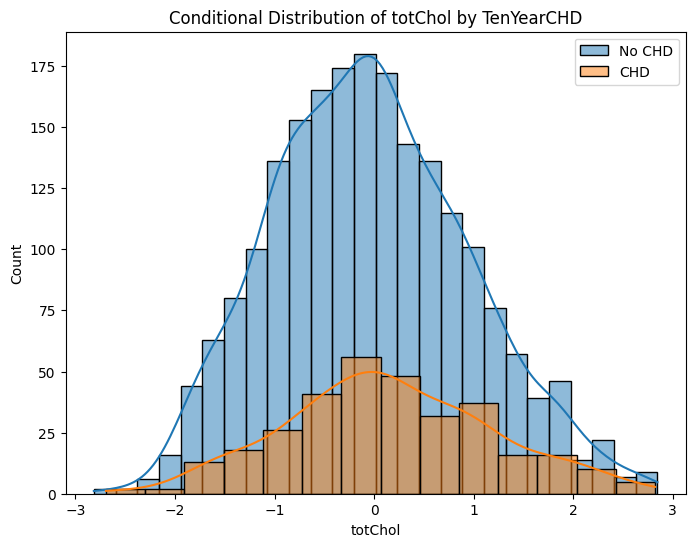

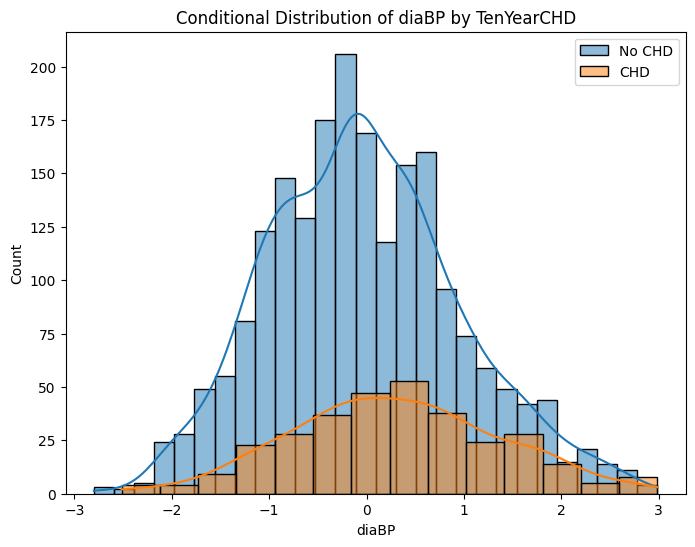

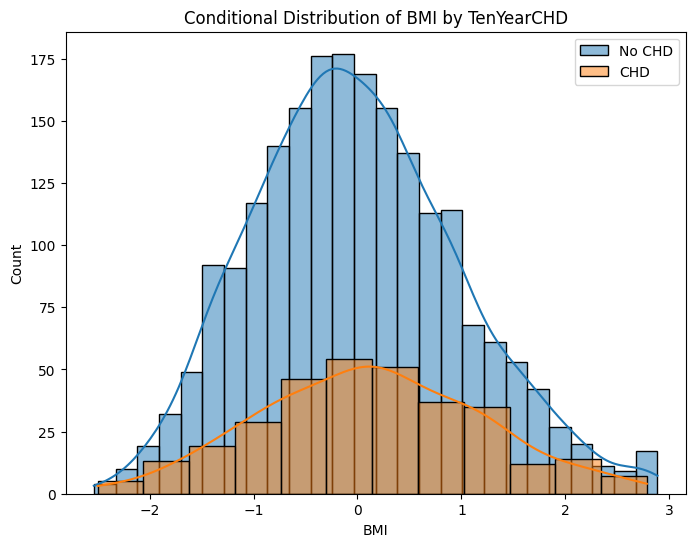

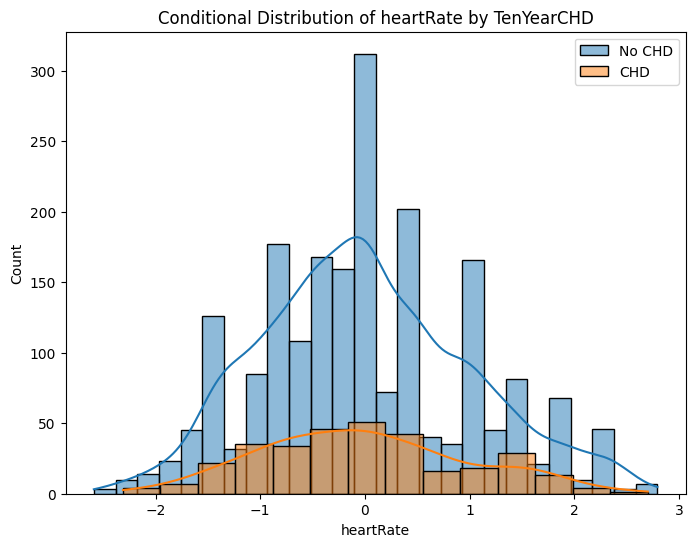

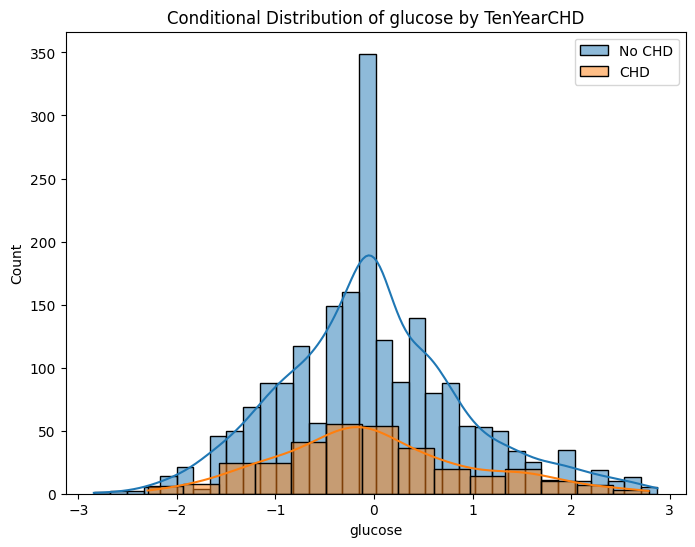

In [ ]:
# Combine the training data with the target variable
train_data = X_train.copy()
train_data['TenYearCHD'] = Y_train

# Iterate over each feature/column in the training data
X_train_no_target = X_train.drop(['TenYearCHD'], axis=1)
for column in X_train_no_target.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[train_data['TenYearCHD'] == 0][column], label='No CHD', kde=True)
    sns.histplot(train_data[train_data['TenYearCHD'] == 1][column], label='CHD', kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Conditional Distribution of {column} by TenYearCHD')
    plt.legend()
    plt.show()

> ### Naive Bayes Classifier Implementation from Scratch

In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [ ]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [ ]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

> ### Train-Test Split and Naive Bayes Classification Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
# Split the data into training and testing sets
train, test = train_test_split(cv_data_no_dependencies, test_size=.2, random_state=41)

# Extract the features and target variables from the training set
X_train = train.iloc[:,:-1].values
Y_train = train.iloc[:,-1].values

# Extract the features from the testing set
X_test_ = test.iloc[:,:-1].values

# Extract the target variable from the testing set
Y_test_ = test.iloc[:,-1].values

# Predict the target variable using the Naive Bayes classifier
Y_pred = naive_bayes_gaussian(train, X=X_test_, Y="TenYearCHD")

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test_, Y_pred)

# Print the accuracy of the model
print("Model Accuracy:", accuracy)


Model Accuracy: 0.8873949579831932


> ### Comparing Naive Bayes Classifier to Standard Python Packages

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Instantiate the Gaussian Naive Bayes classifier
sklearn_nb_classifier = GaussianNB()

# Train the classifier on the training set
sklearn_nb_classifier.fit(X_train, Y_train)

# Make predictions on the testing set
sklearn_predictions = sklearn_nb_classifier.predict(X_test_)

# Calculate the accuracy of the predictions
sklearn_accuracy = accuracy_score(Y_test_, sklearn_predictions)

# Print the accuracy of the standard Naive Bayes classifier
print("Standard NB Classifier Accuracy:", sklearn_accuracy)

Standard NB Classifier Accuracy: 0.8873949579831932
